# Cars Dataset (1970-2024)

## Cars Dataset Data Dictionary (1970 - 2024)

| Feature       | Description                                           |
|---------------|-------------------------------------------------------|
| Model         | The model of the car.                                 |
| Year          | The manufacturing year of the car.                    |
| Price         | The price of the car.                                 |
| Transmission  | The type of transmission used in the car.             |
| Mileage       | The mileage of the car.                               |
| FuelType      | The type of fuel used by the car.                     |
| Tax           | The tax rate applicable to the car.                   |
| MPG           | The miles per gallon efficiency of the car.           |
| EngineSize    | The size of the car's engine.                         |
| Manufacturer  | The manufacturer of the car.                          |

## Importing Libraries

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [3]:
df = pd.read_csv('CarsData.csv')
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [5]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [7]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [8]:
df["Manufacturer"].value_counts()

ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: Manufacturer, dtype: int64

In [9]:
df["year"].value_counts()

2019    26165
2017    21616
2016    15724
2018    13570
2015     7586
2014     4053
2020     4040
2013     2590
2012      633
2011      432
2010      340
2009      277
2008      199
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2024        1
Name: year, dtype: int64

In [10]:
df["fuelType"].value_counts()

Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: fuelType, dtype: int64

In [11]:
# Select target(fuel type) of classification
df1 = df.copy()
df.drop("fuelType", axis = 1, inplace = True)
df = pd.concat([df, df1["fuelType"]], axis = 1)
df.head()

,model,year,price,transmission,mileage,tax,mpg,engineSize,Manufacturer,fuelType
0,I10,2017,7495,Manual,11630,145,60.1,1.0,hyundi,Petrol
1,Polo,2017,10989,Manual,9200,145,58.9,1.0,volkswagen,Petrol
2,2 Series,2019,27990,Semi-Auto,1614,145,49.6,2.0,BMW,Diesel
3,Yeti Outdoor,2017,12495,Manual,30960,150,62.8,2.0,skoda,Diesel
4,Fiesta,2017,7999,Manual,19353,125,54.3,1.2,ford,Petrol


In [12]:
cols = ['price',
        'mileage',
        'tax',
        'mpg',
        'engineSize']

df[cols] = df[cols].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  float64
 5   tax           97712 non-null  float64
 6   mpg           97712 non-null  float64
 7   engineSize    97712 non-null  float64
 8   Manufacturer  97712 non-null  object 
 9   fuelType      97712 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 7.5+ MB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  float64
 5   tax           97712 non-null  float64
 6   mpg           97712 non-null  float64
 7   engineSize    97712 non-null  float64
 8   Manufacturer  97712 non-null  object 
 9   fuelType      97712 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 7.5+ MB


# EDA (Exploratory Data Analysis)

In [15]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

<AxesSubplot: >

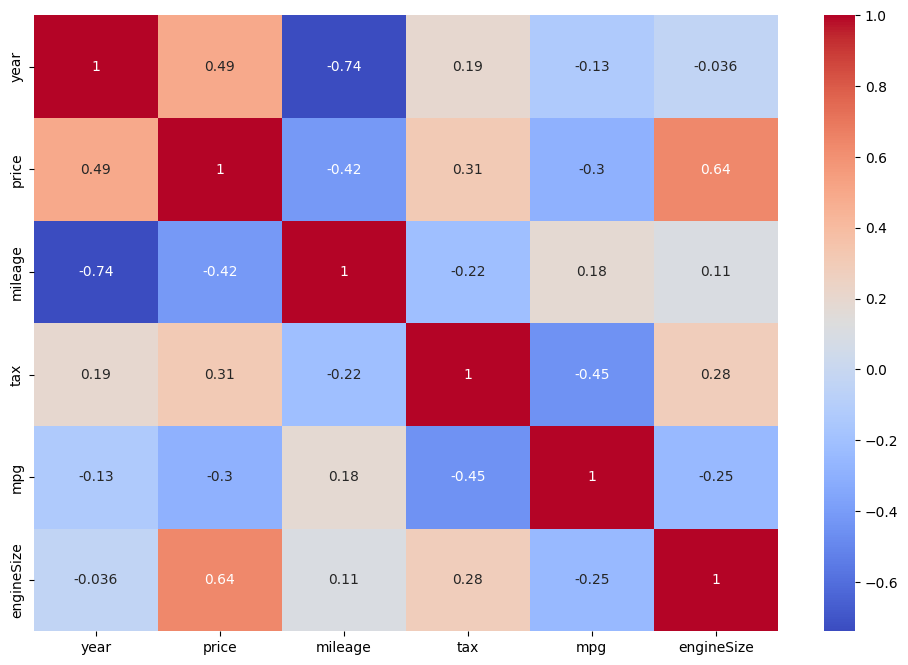

In [16]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

## Car prices over the year

Text(0, 0.5, 'Total Price')

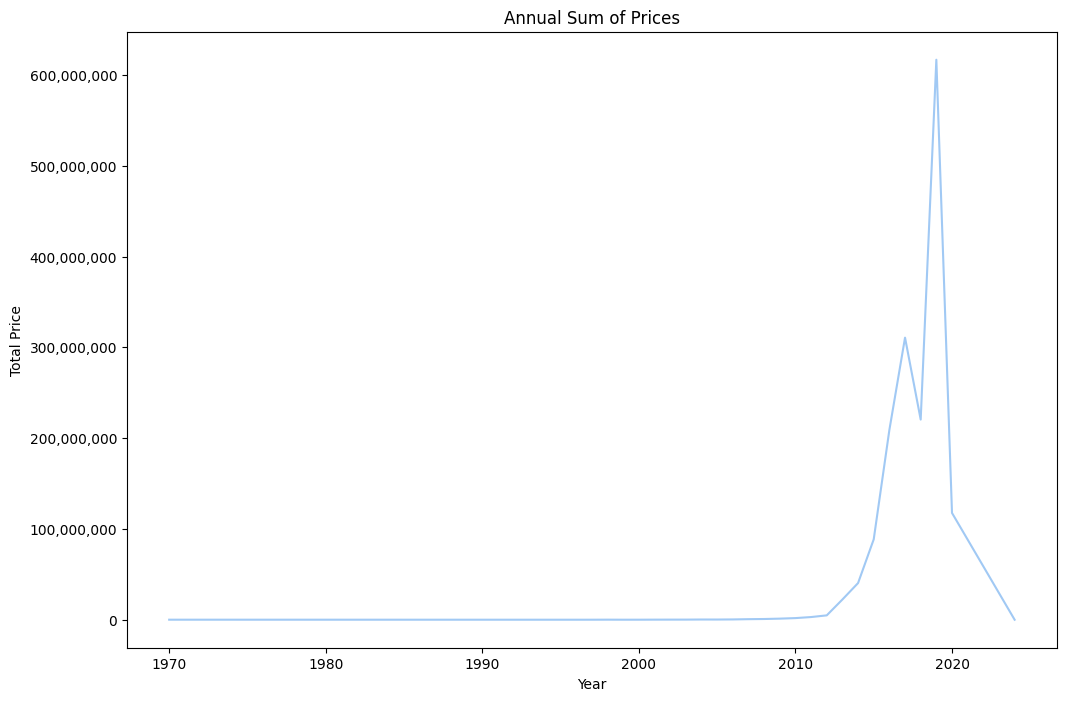

In [17]:
plt.figure(figsize=(12, 8))
ax = df.groupby('year')['price'].sum().plot(kind='line', color=sns.color_palette('pastel'))

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Annual Sum of Prices')
plt.xlabel('Year')
plt.ylabel('Total Price')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019'),
  Text(4, 0, '2020'),
  Text(5, 0, '2024')])

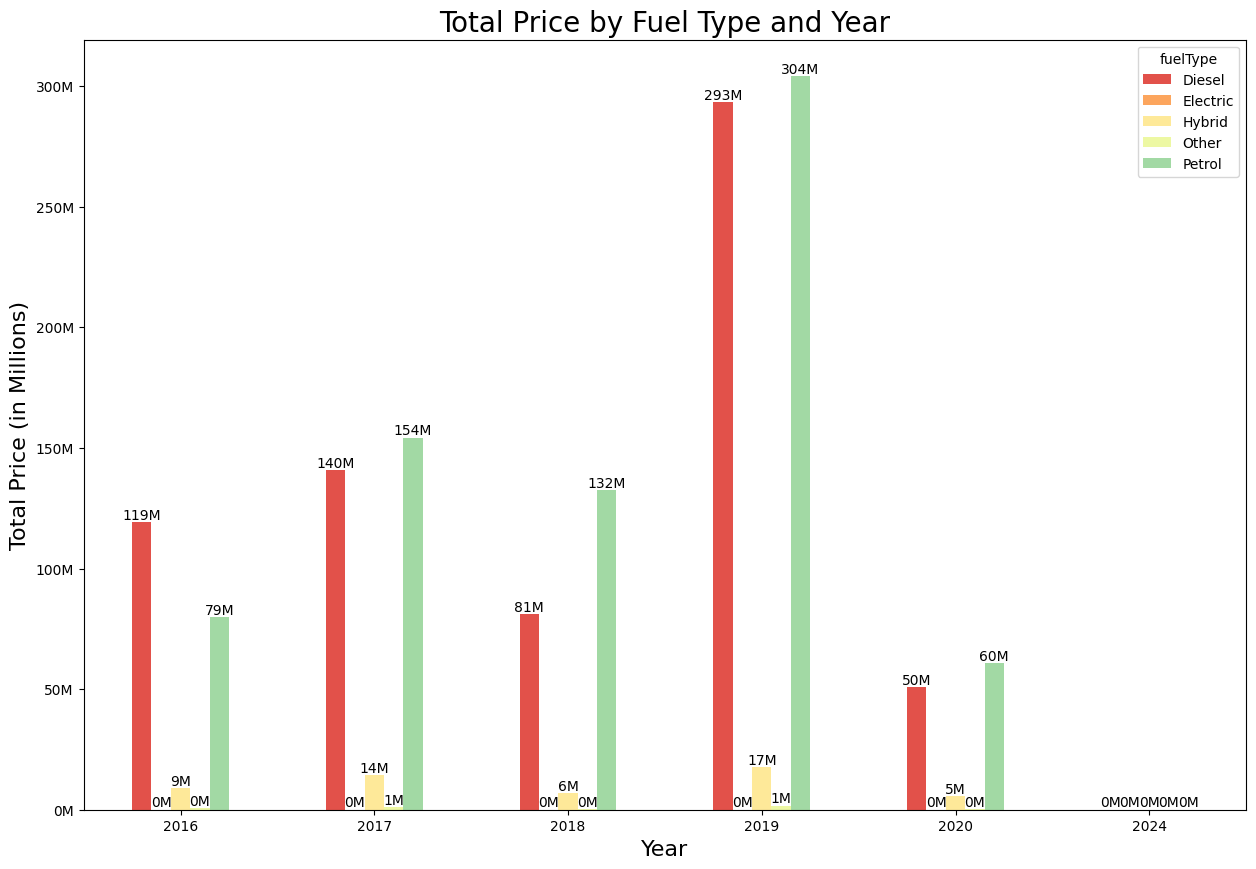

In [18]:
from matplotlib.ticker import FuncFormatter

df_temp = df[df.year > 2015]
df_temp

def millions(x, pos):
    'The two args are the value and tick position'
    return f'{int(x / 1e6)}M'


ax = df_temp.groupby(['year', 'fuelType'])['price'].sum().unstack().plot(
    kind='bar',
    color=sns.color_palette("Spectral"),
    figsize=(15, 10) 
)

formatter = FuncFormatter(millions)

ax.set_title('Total Price by Fuel Type and Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Total Price (in Millions)', fontsize=16)

ax.yaxis.set_major_formatter(formatter)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height() / 1e6)}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=0)

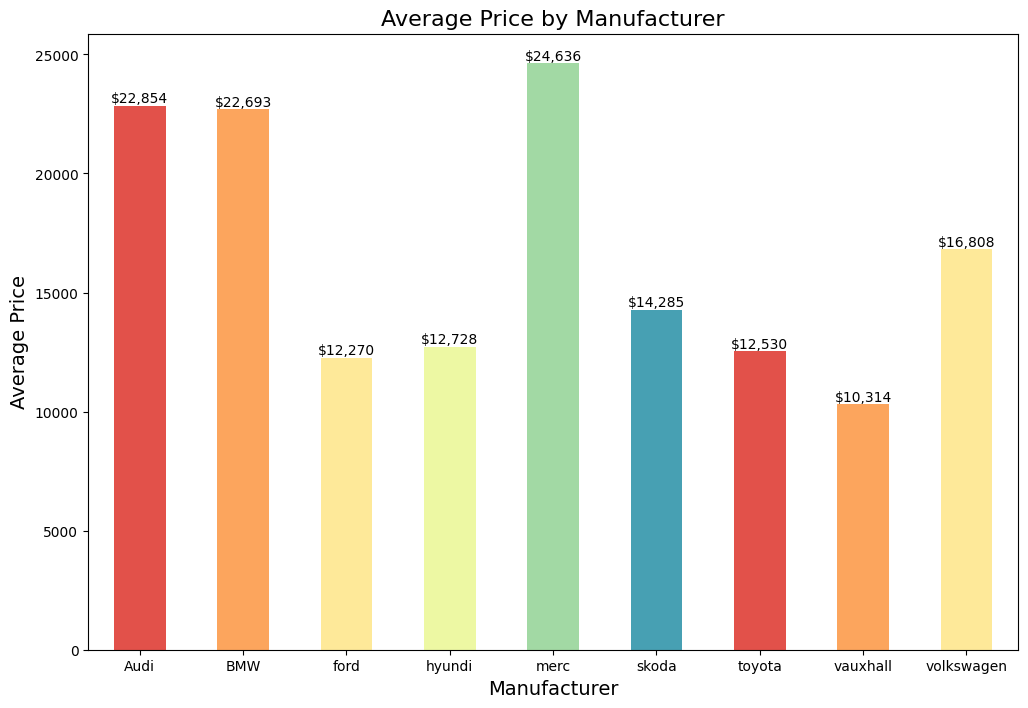

In [19]:
plt.figure(figsize=(12, 8))
ax = df.groupby('Manufacturer')['price'].mean().plot(kind='bar', color=sns.color_palette("Spectral"))

ax.set_title('Average Price by Manufacturer', fontsize=16)
ax.set_xlabel('Manufacturer', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

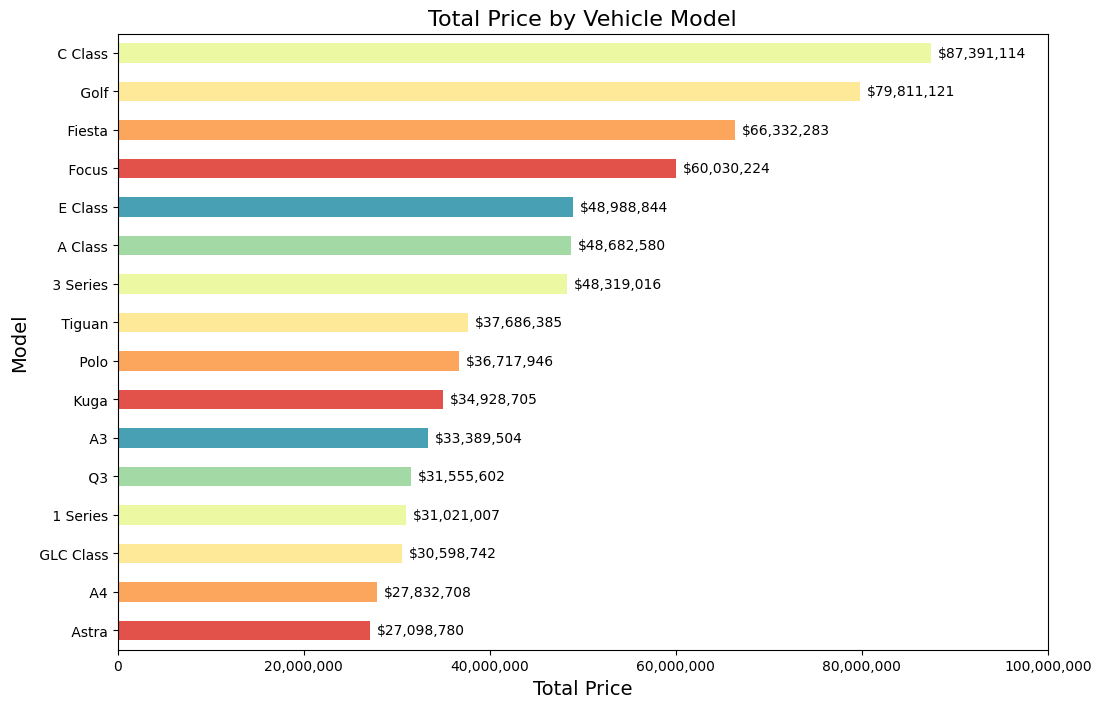

In [20]:
plt.figure(figsize=(12, 8))
ax = df.groupby("model")['price'].sum().sort_values(ascending=False)[15::-1].plot(
    kind='barh',
    color=sns.color_palette("Spectral")
)

ax.set_title('Total Price by Vehicle Model', fontsize=16)
ax.set_xlabel('Total Price', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

ax.set_xlim(0, 100_000_000)
plt.show()

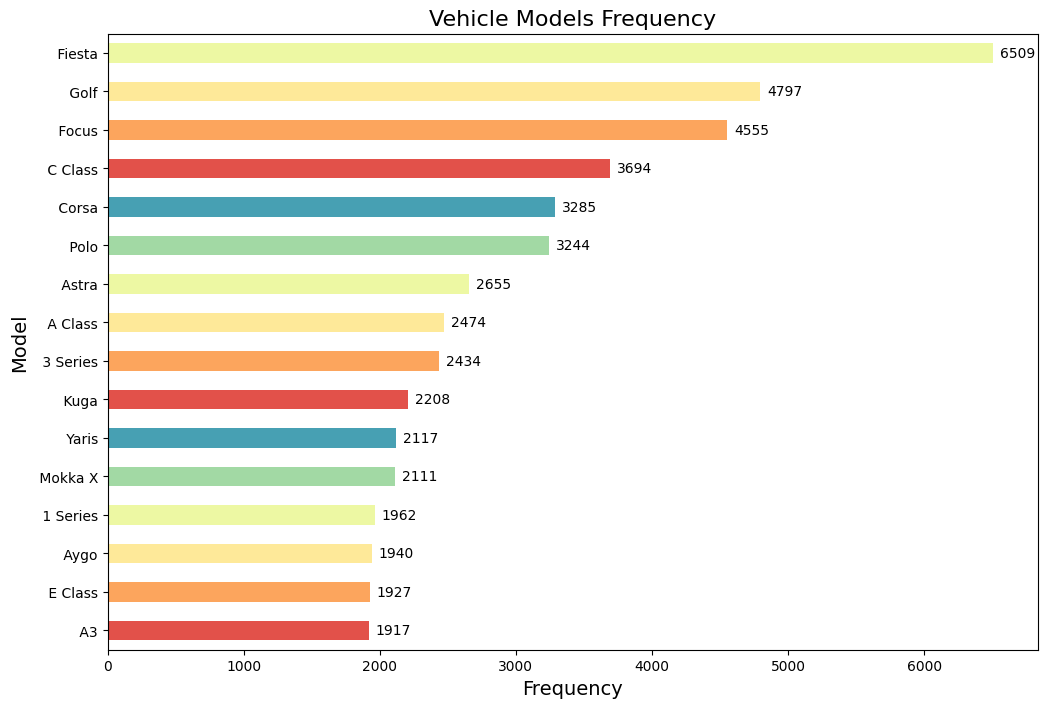

In [21]:
plt.figure(figsize=(12, 8))
ax = df.model.value_counts()[15::-1].plot(kind='barh', x='model', y='count', color=sns.color_palette("Spectral"))

ax.set_title('Vehicle Models Frequency', fontsize=16)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

In [22]:
cat_cols = ["model", "transmission", "fuelType", "Manufacturer"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label in cat_cols:
    df[label] = le.fit_transform(df[label])
df

,model,year,price,transmission,mileage,tax,mpg,engineSize,Manufacturer,fuelType
0,81,2017,7495.0,1,11630.0,145.0,60.1,1.0,3,4
1,115,2017,10989.0,1,9200.0,145.0,58.9,1.0,8,4
2,1,2019,27990.0,3,1614.0,145.0,49.6,2.0,1,0
3,184,2017,12495.0,1,30960.0,150.0,62.8,2.0,5,0
4,60,2017,7999.0,1,19353.0,125.0,54.3,1.2,2,4
...,...,...,...,...,...,...,...,...,...,...
97707,60,2017,10447.0,0,8337.0,145.0,54.3,1.0,2,4
97708,2,2014,14995.0,1,25372.0,30.0,61.4,2.0,1,0
97709,60,2017,8950.0,1,19910.0,125.0,54.3,1.2,2,4
97710,25,2017,10700.0,0,24468.0,125.0,50.4,1.4,7,4


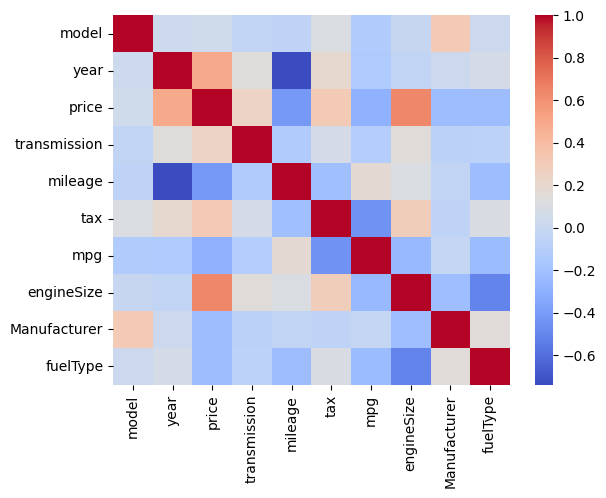

In [23]:
sns.heatmap(df.corr(), fmt = ".3f", cmap = "coolwarm")
plt.show()


In [24]:
# Use IQR method to remove outliers
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]
df

,model,year,price,transmission,mileage,tax,mpg,engineSize,Manufacturer,fuelType
0,81,2017,7495.0,1,11630.0,145.0,60.1,1.0,3,4
1,115,2017,10989.0,1,9200.0,145.0,58.9,1.0,8,4
3,184,2017,12495.0,1,30960.0,150.0,62.8,2.0,5,0
4,60,2017,7999.0,1,19353.0,125.0,54.3,1.2,2,4
6,99,2019,17990.0,1,7038.0,145.0,34.4,1.5,2,4
...,...,...,...,...,...,...,...,...,...,...
97705,99,2017,14795.0,1,25570.0,150.0,60.1,2.0,2,0
97706,75,2015,17998.0,1,46294.0,200.0,39.8,2.0,8,4
97708,2,2014,14995.0,1,25372.0,30.0,61.4,2.0,1,0
97709,60,2017,8950.0,1,19910.0,125.0,54.3,1.2,2,4


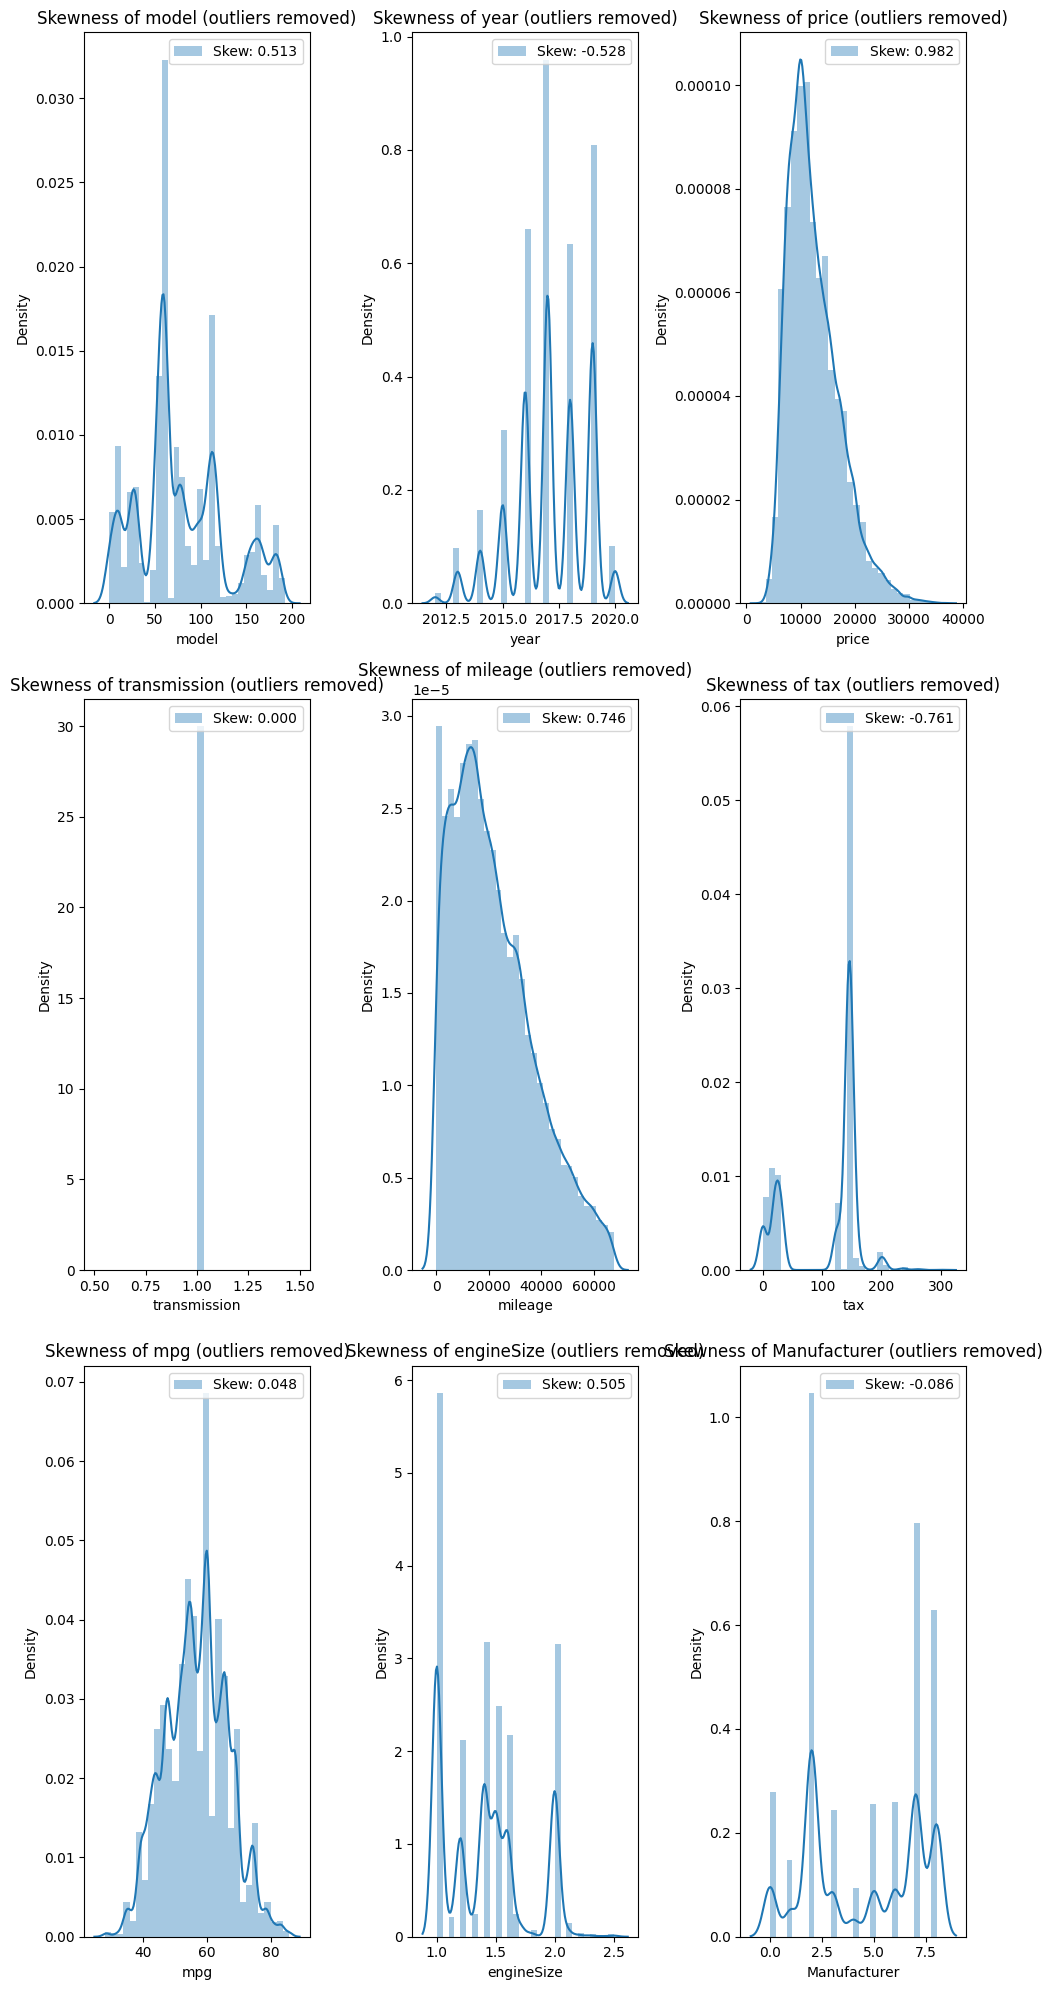

In [36]:
# Check how many outliers are removed
plt.figure(figsize = (10, 20))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    skewness = df[col].skew()
    sns.distplot(df[col], label = f"Skew: {skewness:.3f}", bins = 30)
    plt.title(f"Skewness of {col} (outliers removed)")
    plt.legend(loc = "best")
    plt.tight_layout()
    plt.plot()

Column : model


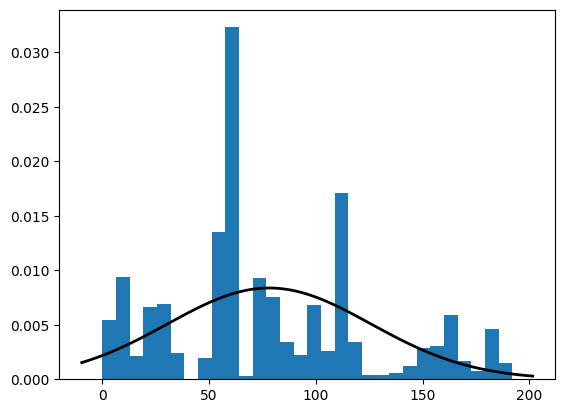

Statistics = 0.949, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : year


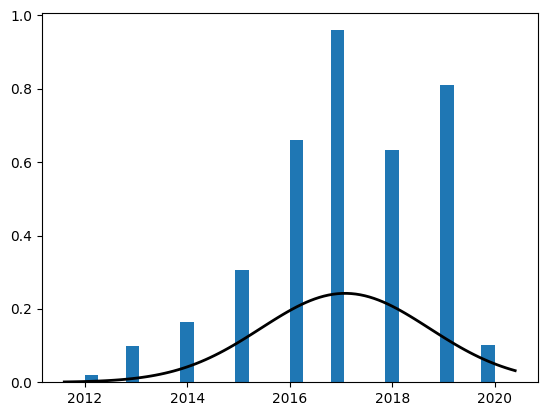

Statistics = 0.937, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : price


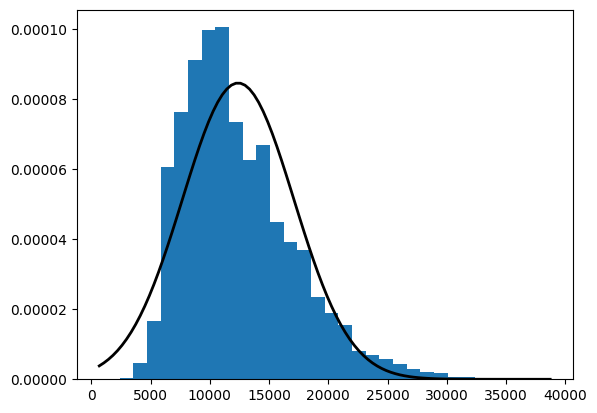

Statistics = 0.942, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : transmission


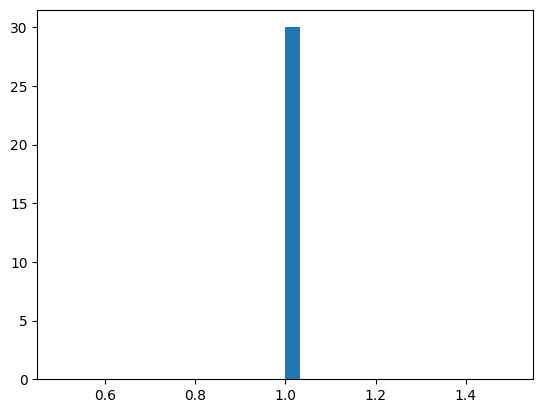

Statistics = 1.000, p = 1.000
Data looks Gaussian Distribution(fail to reject H0) 

Column : mileage


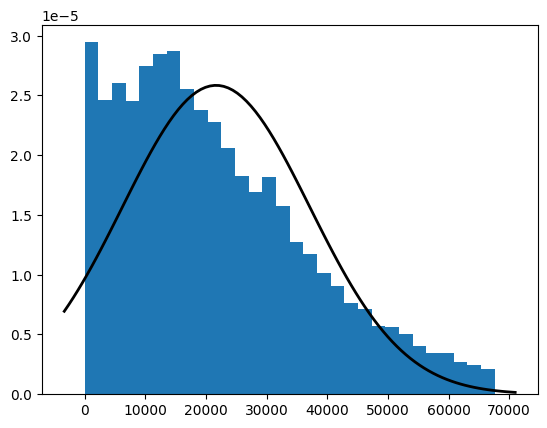

Statistics = 0.944, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : tax


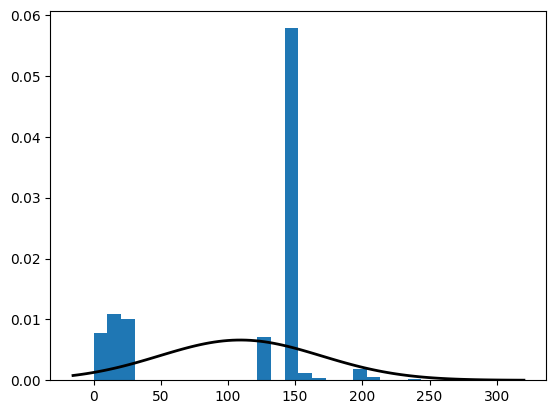

Statistics = 0.730, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : mpg


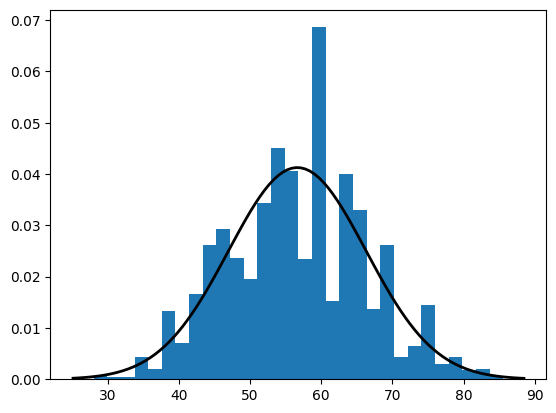

Statistics = 0.995, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : engineSize


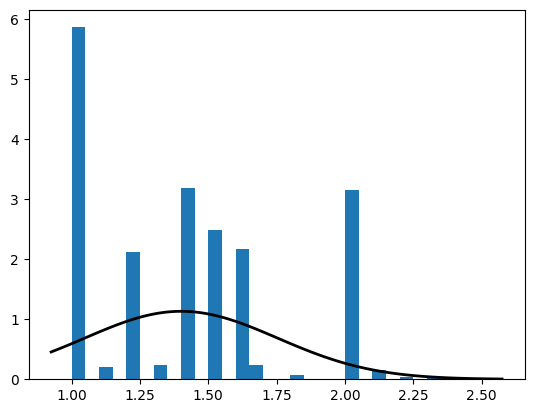

Statistics = 0.880, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : Manufacturer


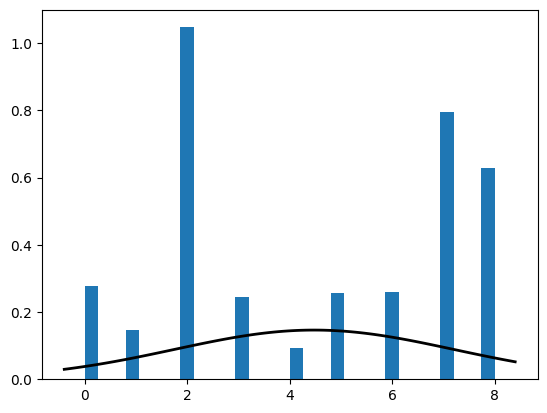

Statistics = 0.867, p = 0.000
Data does not look Gaussian Distribution(reject H0) 



In [26]:
# Need to remove outliers
# Check how to remove outliers(KMeans/IQR etc.)
import numpy as np
from scipy import stats
from scipy.stats import shapiro
for col in df.columns[:-1]:
    print(f"Column : {col}")
    plt.hist(df[col], density = True, bins = 30)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(df[col]), np.std(df[col]))
    plt.plot(x, p, 'k', linewidth = 2)
    plt.show()
    
    stat, p = shapiro(df[col])
    print("Statistics = %.3f, p = %.3f" %(stat, p))
    
    alpha = 0.05
    if p > alpha:
        print("Data looks Gaussian Distribution(fail to reject H0) \n")
    else:
        print("Data does not look Gaussian Distribution(reject H0) \n")

## Machine Learning

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
def accuracy(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)
    
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return accuracy_score(y_test, y_reg), accuracy_score(y_test, y_svc), accuracy_score(y_test, y_rfc), accuracy_score(y_test, y_gbc), accuracy_score(y_test, y_abc), accuracy_score(y_test, y_knc)

In [33]:
scores = pd.DataFrame(columns = ["REG", "SVC", "RFC", "GBC", "ABC", "KNC"],
                     index = ["ACC"])
acc = [reg, svc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)
scores.iloc[0, :] = acc
scores

,REG,SVC,RFC,GBC,ABC,KNC
ACC,0.785996,0.773877,0.997211,0.995287,0.817736,0.755603


<AxesSubplot: >

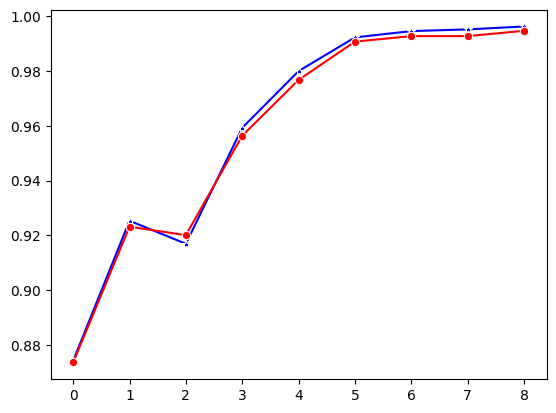

In [34]:
# Check train/test model score of RFC
train_scores = []
test_scores = []
for i in range(1, 10):
    rfc = RandomForestClassifier(n_estimators = i, max_depth = i+1, min_samples_split = i+1)
    rfc.fit(X_train, y_train)
    
    train_scores.append(rfc.score(X_train, y_train))
    test_scores.append(rfc.score(X_test, y_test))
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

In [35]:
# Train/Test Model Score of RFC
rfc = RandomForestClassifier(n_estimators = 2, max_depth = 3, min_samples_split = 3)
rfc.fit(X_train, y_train)
print("RFC Train Model Score :", rfc.score(X_train, y_train))
print("RFC Test Model Score :", rfc.score(X_test, y_test))

RFC Train Model Score : 0.9205761415827062
RFC Test Model Score : 0.9219967298259113
